In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
print(" Max Number of Printed Rows:\n",pd.options.display.max_rows) 
pd.options.display.max_rows = 20

 Max Number of Printed Rows:
 60


In [2]:
df = pd.read_csv('credit_card_transaction_flow.csv')
print("Raw CSV Data:\n",df)
#print("\n\nData Frame Info:\n", df.info())
print("Description of CSV Entries:\n", df.describe())
#This stops the infinite loop from the 50k entries.
df = df.head(8000)

Raw CSV Data:
        Customer ID       Name    Surname Gender   Birthdate  \
0           752858       Sean  Rodriguez      F  20-10-2002   
1            26381   Michelle     Phelps    NaN  24-10-1985   
2           305449      Jacob   Williams      M  25-10-1981   
3           988259     Nathan     Snyder      M  26-10-1977   
4           764762    Crystal      Knapp      F  02-11-1951   
...            ...        ...        ...    ...         ...   
49995       891845  Christine      Leach      F  21-10-1997   
49996       800560       Anna      Allen      F  21-10-1999   
49997       133285     Nicole   Franklin      M  26-10-1979   
49998       616122      Maria     Keller      M  25-10-1981   
49999       832184      Billy     Walker      F  31-10-1958   

       Transaction Amount        Date                 Merchant Name  \
0                   35.47  03-04-2023                 Smith-Russell   
1                 2552.72  17-07-2023        Peck, Spence and Young   
2              

In [3]:
#Separate rows by categories
column_categories = df['Category']
each_category = df['Category'].unique()
print(each_category)

['Cosmetic' 'Travel' 'Clothing' 'Electronics' 'Restaurant' 'Market']


In [4]:
#Formats the Date column so that it understands day first.
#https://www.w3schools.com/python/pandas/pandas_cleaning_wrong_format.asp
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)

#Cleans the data: Removes entries with NULL values in Date; Category; Transaction Amount.
df.dropna(subset=['Date'], inplace = True)
df.dropna(subset=['Category'], inplace = True)
df.dropna(subset=['Transaction Amount'], inplace = True)

#Set parameters 
for x in df.index:
  if df.loc[x, "Transaction Amount"] > 1500: # play around with this
    df.drop(x, inplace = True)

In [5]:
#Extracts Month from Date and stores it into month
month = df['Month'] = df['Date'].dt.month

#Shows Mean and Standard Deviation
print("\nMean and Standard Deviation Per Month for Each Category\n")
info_DS = df.groupby('Category').agg({'Transaction Amount': ['mean', 'std']})
print(info_DS)


Mean and Standard Deviation Per Month for Each Category

            Transaction Amount            
                          mean         std
Category                                  
Clothing            160.029164   80.821815
Cosmetic            105.064502   54.188466
Electronics         518.835565  274.776963
Market              251.962239  142.634154
Restaurant           54.019155   25.798297
Travel              790.611812  406.270271



Average Credit Card Charges for All Categories
    Month  Transaction Amount
0      1          265.811615
1      2          284.377073
2      3          271.697484
3      4          265.216386
4      5          264.904061
5      6          258.268210
6      7          260.741703
7      8          271.045957
8      9          258.849539
9     10          262.911156 



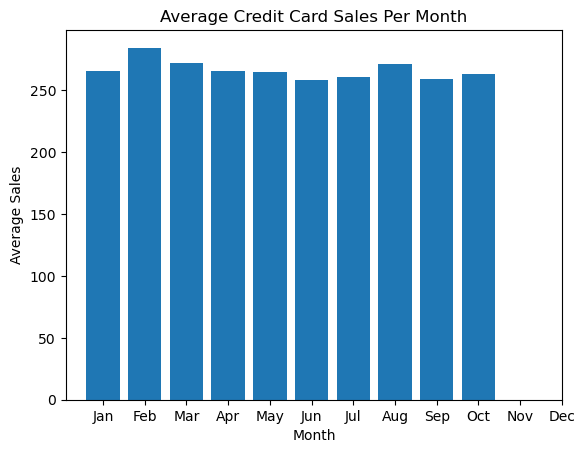

In [6]:
total_avg_sales = df.groupby('Month')['Transaction Amount'].mean().reset_index()
print("\nAverage Credit Card Charges for All Categories\n",total_avg_sales, "\n")
plt.figure()
plt.bar(total_avg_sales['Month'], total_avg_sales['Transaction Amount'])
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Credit Card Sales Per Month')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


This bar graph shows the average credit card charges for each month in 2023 for the categories: 
['Cosmetic' 'Travel' 'Clothing' 'Electronics' 'Restaurant' 'Market']. This Bar Graph is consistent with the Mean and Standard Deviation Per Month for Each Category as shown above.

References

Surana, R.(2023). Comprehensive Credit Card Transactions Dataset. kaggle.com. 
    https://www.kaggle.com/datasets/rajatsurana979/comprehensive-credit-card-transactions-dataset/data
